In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('balanced_crop_pesticide_dataset.csv')
df.head()


,temperature,humidity,wind_speed,rainfall,time_of_day,crop_type,disease_type,label
0,22.8,54.3,5.8,0.0,Evening,Tomato,Target Spot,Good
1,26.2,50.7,8.6,0.0,Evening,Tomato,Target Spot,Good
2,24.5,78.8,7.9,0.0,Morning,Tomato,Target Spot,Good
3,27.6,72.8,6.8,0.0,Morning,Tomato,Target Spot,Good
4,27.6,53.4,7.4,0.0,Evening,Tomato,Target Spot,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14997 entries, 0 to 14996
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temperature   14997 non-null  float64
 1   humidity      14997 non-null  float64
 2   wind_speed    14997 non-null  float64
 3   rainfall      14997 non-null  float64
 4   time_of_day   14997 non-null  object 
 5   crop_type     14997 non-null  object 
 6   disease_type  14997 non-null  object 
 7   label         14997 non-null  object 
dtypes: float64(4), object(4)
memory usage: 937.4+ KB


In [4]:
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'rainfall', 'time_of_day',
       'crop_type', 'disease_type', 'label'],
      dtype='object')

In [5]:
df = df[['temperature', 'humidity', 'wind_speed', 'rainfall',
       'crop_type', 'disease_type', 'label']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14997 entries, 0 to 14996
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temperature   14997 non-null  float64
 1   humidity      14997 non-null  float64
 2   wind_speed    14997 non-null  float64
 3   rainfall      14997 non-null  float64
 4   crop_type     14997 non-null  object 
 5   disease_type  14997 non-null  object 
 6   label         14997 non-null  object 
dtypes: float64(4), object(3)
memory usage: 820.3+ KB


In [7]:
columns = df.columns
for col in columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("==============================")
    print()
    print("===============================")

Value counts for column: temperature
temperature
30.9    125
21.4    118
25.9    116
25.0    115
30.1    115
       ... 
32.1     26
37.3     24
34.6     23
18.0     18
40.0     14
Name: count, Length: 221, dtype: int64

Value counts for column: humidity
humidity
74.6    53
78.7    52
79.7    51
67.5    51
55.9    50
        ..
44.8     3
81.2     3
92.8     3
93.2     3
30.0     2
Name: count, Length: 651, dtype: int64

Value counts for column: wind_speed
wind_speed
9.6     191
8.7     188
9.1     187
6.8     187
7.3     185
       ... 
14.3     63
11.3     59
12.7     54
2.0      44
15.0     34
Name: count, Length: 131, dtype: int64

Value counts for column: rainfall
rainfall
0.0    12463
4.8       71
2.4       66
3.4       63
1.7       60
4.6       60
0.9       58
1.0       58
3.1       58
0.5       58
3.6       58
3.3       57
1.5       57
1.2       56
2.3       56
0.3       55
0.7       54
3.0       54
2.2       54
1.4       54
1.8       53
1.9       53
2.1       53
2.7       52
3

disease_type
Early blight                            2333
Late blight                             2333
Blast                                   1125
Rust                                    1125
Brown spot                              1125
Leaf spot                               1125
Tomato YellowLeaf Curl Virus             833
Tomato mosaic virus                      833
Target Spot                              833
Bacterial spot                           833
Spider mites Two spotted spider mite     833
Leaf Mold                                833
Septoria leaf spot                       833
Name: count, dtype: int64

Value counts for column: label
label
Bad     7505
Good    7492
Name: count, dtype: int64



In [8]:
df.head( )

,temperature,humidity,wind_speed,rainfall,crop_type,disease_type,label
0,22.8,54.3,5.8,0.0,Tomato,Target Spot,Good
1,26.2,50.7,8.6,0.0,Tomato,Target Spot,Good
2,24.5,78.8,7.9,0.0,Tomato,Target Spot,Good
3,27.6,72.8,6.8,0.0,Tomato,Target Spot,Good
4,27.6,53.4,7.4,0.0,Tomato,Target Spot,Good


Text(0.5, 1.0, 'Disease Type vs Label')

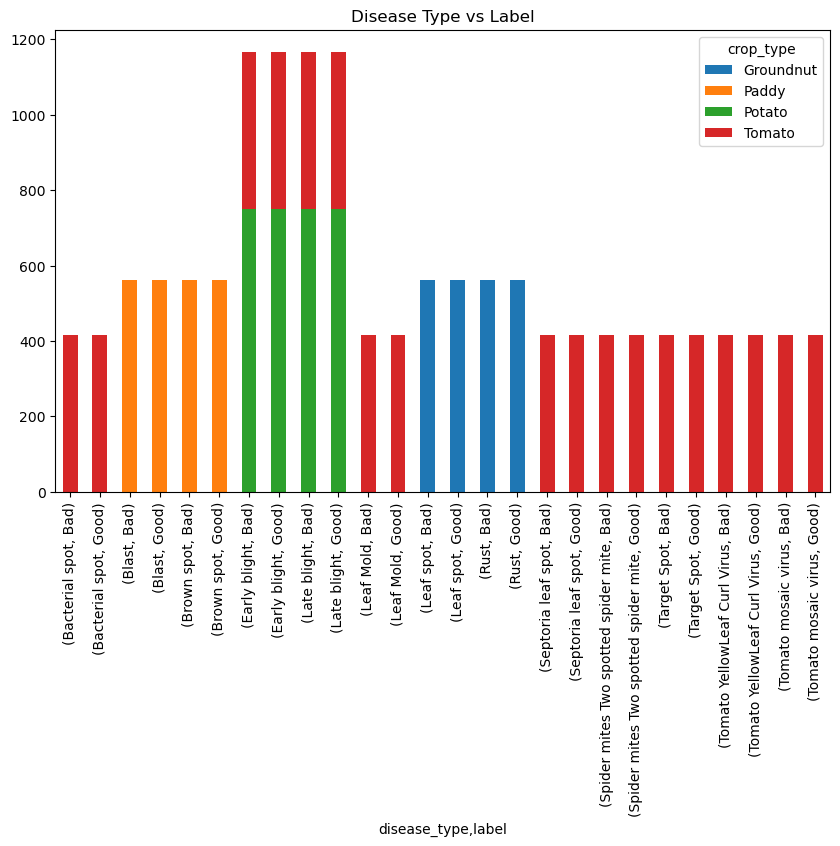

In [9]:
df.groupby(['disease_type','label','crop_type']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Disease Type vs Label')

<Axes: xlabel='label'>

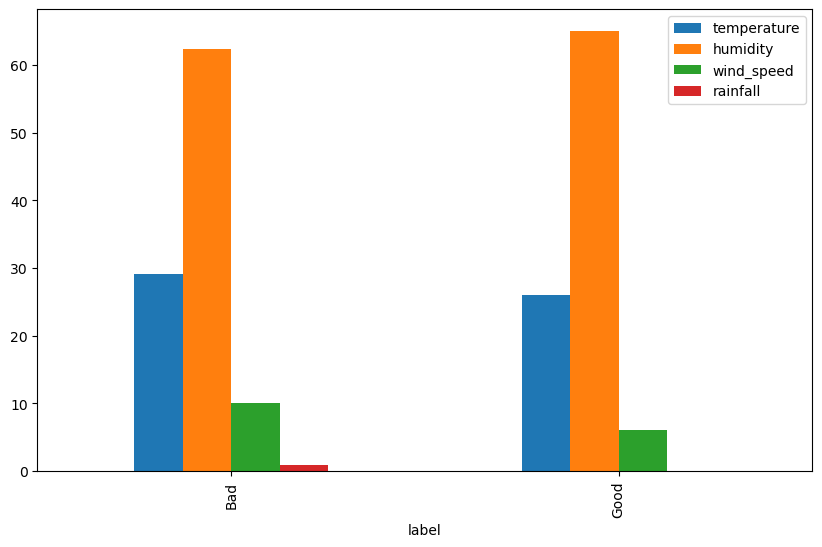

In [10]:
df.groupby(['label']).agg({'temperature':'mean', 'humidity':'mean', 'wind_speed':'mean', 'rainfall':'mean'}).plot(kind='bar', figsize=(10,6))

In [11]:
df.head()

,temperature,humidity,wind_speed,rainfall,crop_type,disease_type,label
0,22.8,54.3,5.8,0.0,Tomato,Target Spot,Good
1,26.2,50.7,8.6,0.0,Tomato,Target Spot,Good
2,24.5,78.8,7.9,0.0,Tomato,Target Spot,Good
3,27.6,72.8,6.8,0.0,Tomato,Target Spot,Good
4,27.6,53.4,7.4,0.0,Tomato,Target Spot,Good


In [12]:
df['disease_type'].unique().__len__()

13

In [13]:
df = pd.get_dummies(df, columns=['crop_type', 'disease_type','label'], drop_first=True,dtype=int)

In [14]:
df.head()

,temperature,humidity,wind_speed,rainfall,crop_type_Paddy,crop_type_Potato,crop_type_Tomato,disease_type_Blast,disease_type_Brown spot,disease_type_Early blight,disease_type_Late blight,disease_type_Leaf Mold,disease_type_Leaf spot,disease_type_Rust,disease_type_Septoria leaf spot,disease_type_Spider mites Two spotted spider mite,disease_type_Target Spot,disease_type_Tomato YellowLeaf Curl Virus,disease_type_Tomato mosaic virus,label_Good
0,22.8,54.3,5.8,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,26.2,50.7,8.6,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,24.5,78.8,7.9,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,27.6,72.8,6.8,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,27.6,53.4,7.4,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
X = df.drop('label_Good', axis=1)
y = df['label_Good']

## Logistic Regression 

In [17]:
# # Define pipeline steps
# pipeline_steps = [
#     ('scaler', StandardScaler()),
#     ('feature_selection', RFECV(estimator=LogisticRegression(), step=1, cv=5)),
#     ('classifier', LogisticRegression())
# ]

# # Create pipeline
# pipeline = Pipeline(pipeline_steps)

# # Define parameter grid for GridSearchCV
# param_grid = {
#     'classifier__C': [0.01, 0.1, 1, 10, 100],
#     'classifier__penalty': ['l1', 'l2'],
#     'classifier__solver': ['liblinear']
# }

# # Wrap pipeline with GridSearchCV
# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Fit model
# grid_search.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = grid_search.predict(X_test)

# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))


## Random Forest Classifier

In [18]:
# pipeline_steps = [
#     ('scalar',StandardScaler()),
#     ('feature_selection',RFECV(estimator=RandomForestClassifier(), step=1, cv=5)),
#     ('classifier',RandomForestClassifier())
# ]

# pipeline = Pipeline(pipeline_steps)
# param_grid = {
#     'classifier__n_estimators':[50,100,200],
#     'classifier__max_depth':[None,10,20,30],
#     'classifier__min_samples_split':[2,5,10],
#     'classifier__min_samples_leaf':[1,2,4]
# }
# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# grid_search.fit(X_train, y_train)
# y_pred = grid_search.predict(X_test)
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))



In [19]:
# from xgboost import XGBClassifier
# pipeline_steps = [
#     ('scalar',StandardScaler()),
#     ('feature_selection',RFECV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'), step=1, cv=5)),
#     ('classifier',XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
# ]
# pipeline = Pipeline(pipeline_steps)
# param_grid = {
#     'classifier__n_estimators':[50,100,200],
#     'classifier__max_depth':[3,5,7],
#     'classifier__learning_rate':[0.01,0.1,0.2],
#     'classifier__subsample':[0.6,0.8,1.0]
# }
# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# grid_search.fit(X_train, y_train)
# y_pred = grid_search.predict(X_test)
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))


In [21]:

model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

    

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1501
           1       0.93      0.99      0.96      1499

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

Confusion Matrix:
[[1383  118]
 [  14 1485]]


In [35]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, subsample=0.8, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
#!/usr/bin/env python3

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1501
           1       0.92      1.00      0.96      1499

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

Confusion Matrix:
[[1379  122]
 [   0 1499]]


c:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:59:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Text(50.722222222222214, 0.5, 'Actual')

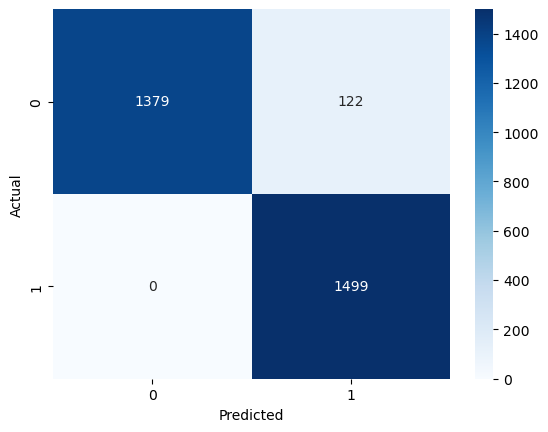

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')